In [0]:
%tensorflow_version 2.x

In [0]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [0]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans = [
         "airplane",										
         "automobile",										
         "bird",										
         "cat",										
         "deer",										
         "dog",										
         "frog",										
         "horse",										
         "ship",										
         "truck"
]

dog


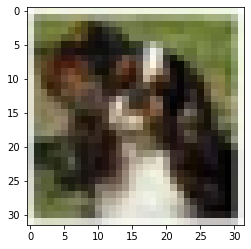

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 500
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

layers = [
    # 27(1 filter) * 64 + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 3*3*64 = 576(1 filter) * 128 + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers=layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [0]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer = "adam",
              metrics = ["accuracy"])

In [0]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [0]:
# 存取模型: model.save("xxx.h5")
# 讀取模型: 
from tensorflow.keras.callbacks import  EarlyStopping, ModelCheckpoint
callbacks = [
             EarlyStopping(patience=3, restore_best_weights=True),
             ModelCheckpoint("cnn.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 8s - loss: 1.6212 - accuracy: 0.4051 - val_loss: 1.2833 - val_accuracy: 0.5422
Epoch 2/100
225/225 - 8s - loss: 1.1779 - accuracy: 0.5805 - val_loss: 1.0170 - val_accuracy: 0.6430
Epoch 3/100
225/225 - 8s - loss: 0.9733 - accuracy: 0.6571 - val_loss: 0.8890 - val_accuracy: 0.6962
Epoch 4/100
225/225 - 8s - loss: 0.8525 - accuracy: 0.7017 - val_loss: 0.8046 - val_accuracy: 0.7224
Epoch 5/100
225/225 - 8s - loss: 0.7595 - accuracy: 0.7361 - val_loss: 0.7782 - val_accuracy: 0.7346
Epoch 6/100
225/225 - 8s - loss: 0.6712 - accuracy: 0.7658 - val_loss: 0.7154 - val_accuracy: 0.7554
Epoch 7/100
225/225 - 8s - loss: 0.5995 - accuracy: 0.7897 - val_loss: 0.7224 - val_accuracy: 0.7628
Epoch 8/100
225/225 - 8s - loss: 0.5287 - accuracy: 0.8150 - val_loss: 0.6816 - val_accuracy: 0.7722
Epoch 9/100
225/225 - 8s - loss: 0.4711 - accuracy: 0.8347 - val_loss: 0.7100 - val_accuracy: 0.7712
Epoch 10/100
225/225 - 8s - loss: 0.4084 - accuracy: 0.8568 - val_loss: 0.7558 - val_accura

In [0]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.7200 - accuracy: 0.7524


[0.7200086712837219, 0.7523999810218811]

In [0]:
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 3, 7])

In [0]:
print(pre.shape)
print(y_test.shape)

(10000,)
(10000, 1)


In [0]:
print(pre.shape)
print(y_test.shape)
y_test_reshape = y_test.reshape(-1)
print(y_test_reshape.shape)

(10000,)
(10000, 1)
(10000,)


In [0]:
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_reshape, pre)
c = ["{}(預測)".format(i) for i in trans]
i = ["{}(真實)".format(i) for i in trans]
pd.DataFrame(mat, columns=c, index=i)

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),807,14,26,26,15,5,13,8,65,21
automobile(真實),15,858,5,9,2,3,15,2,21,70
bird(真實),64,4,631,85,66,34,68,30,7,11
cat(真實),21,6,44,639,49,126,69,28,8,10
deer(真實),23,2,59,87,666,30,61,61,10,1
dog(真實),15,2,42,197,36,624,21,48,9,6
frog(真實),4,3,41,76,18,13,834,5,2,4
horse(真實),13,7,35,50,42,49,4,788,1,11
ship(真實),43,34,14,20,6,8,8,2,847,18
truck(真實),32,51,13,22,0,7,12,10,23,830


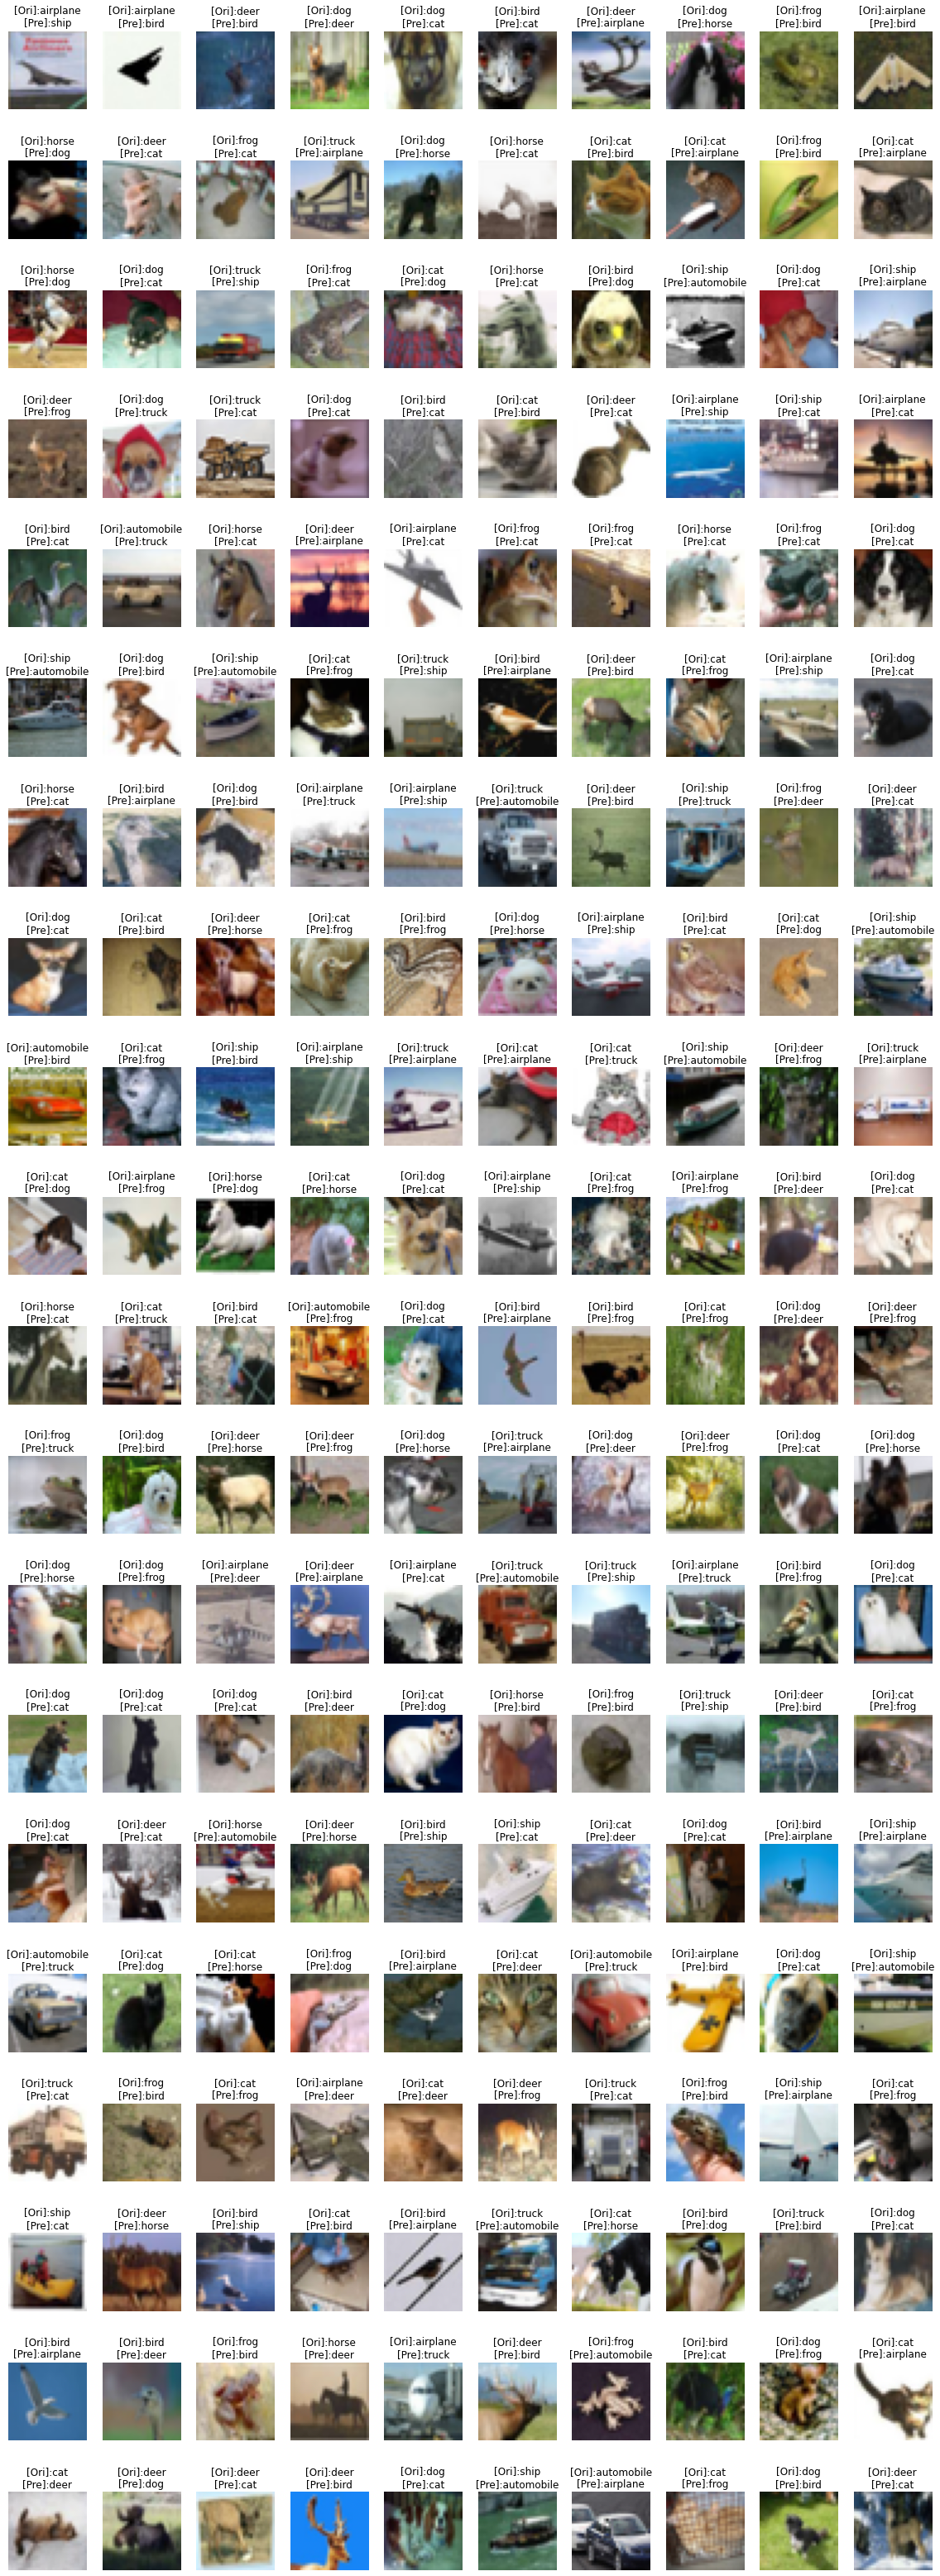

In [0]:
import numpy as np
# nonzero: 取出是True的index
# (x座標, y座標, z座標)
idx = np.nonzero(pre != y_test_reshape)[0]
idx = idx[:200]
# 預測錯誤的圖
false_img = x_test[idx]
false_answer = y_test_reshape[idx]
false_predict = pre[idx]

# 把圖變大一點才塞的下
plt.figure(figsize=(20, 60))
width = 10
height = len(false_img) // width + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    t = "[Ori]:{}\n[Pre]:{}".format(trans[false_answer[i]],
                                    trans[false_predict[i]])
    plt.title(t)
    plt.imshow(img)

In [0]:
from tensorflow.keras.preprocessing.image import load_img
fn = input("輸入檔名:")
img = load_img(fn, target_size=(32, 32))
# 剛剛帶入 (10000, 784)
# 現在帶入 (1, 784)
img_norm = np.array(img).reshape(1, 32, 32, 3) / 255
ans = model.predict_classes(img_norm)[0]
print("應該是:", trans[ans])
plt.imshow(img)

KeyboardInterrupt: ignored

In [0]:
# 讀取model
from tensorflow.keras.models import load_model
loaded = load_model("cnn.h5") 
# 讀取完以後 1. predict 2. fit(不用compile)
loaded.evaluate(x_test_norm, y_test)
# 如果你想看h5 https://support.hdfgroup.org/products/java/release/download.html

313/313 [==============================] - 2s 6ms/step - loss: 0.7200 - accuracy: 0.7524


[0.7200086712837219, 0.7523999810218811]